## SMOTE

In [1]:
import torch
import numpy as np
from torchvision.datasets import EMNIST
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
import torchvision.transforms as transforms

# Define transformation for the images
transform = transforms.Compose([
    transforms.ToTensor(),            # Convert to tensor (1 channel)
])

# Download the EMNIST ByClass dataset
emnist_dataset = EMNIST(root='data', split='byclass', train=True, download=True, transform=transform)

# Extract images and labels
images = []
labels = []
for img, label in emnist_dataset:
    images.append(img.numpy().flatten())  # Flatten the images to 1D
    labels.append(label)

# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

# Count the original class distribution
original_distribution = Counter(y)
print("Original distribution:", original_distribution)

# Apply SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the new class distribution
new_distribution = Counter(y_resampled)
print("New distribution:", new_distribution)

# Convert back to PyTorch tensors
X_resampled_tensor = torch.tensor(X_resampled, dtype=torch.float32)
y_resampled_tensor = torch.tensor(y_resampled, dtype=torch.long)

# Now you can create a new dataset with the resampled data
class ResampledEMNIST(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        return self.images[idx].view(1, 28, 28), self.labels[idx]  # Reshape to original image dimensions

# Create the resampled dataset
resampled_dataset = ResampledEMNIST(X_resampled_tensor, y_resampled_tensor)

Original distribution: Counter({1: 38374, 7: 35754, 3: 35143, 0: 34585, 6: 34232, 2: 34203, 8: 33946, 9: 33847, 4: 33535, 5: 31416, 24: 24983, 40: 24631, 28: 20764, 55: 18262, 47: 15318, 53: 14105, 30: 12602, 18: 11946, 49: 11418, 39: 10177, 12: 10094, 36: 10033, 29: 9820, 15: 9182, 22: 9002, 43: 8738, 25: 8347, 23: 8237, 10: 6407, 37: 5159, 21: 5076, 27: 5073, 14: 4934, 34: 4743, 32: 4695, 31: 4637, 13: 4562, 11: 3878, 19: 3762, 42: 3687, 17: 3152, 52: 2994, 57: 2910, 38: 2854, 56: 2830, 59: 2822, 33: 2771, 50: 2749, 61: 2725, 44: 2725, 35: 2701, 54: 2699, 58: 2697, 48: 2645, 26: 2605, 41: 2561, 16: 2517, 46: 2491, 20: 2468, 51: 2448, 60: 2365, 45: 1896})
New distribution: Counter({35: 38374, 36: 38374, 6: 38374, 3: 38374, 22: 38374, 38: 38374, 5: 38374, 9: 38374, 47: 38374, 4: 38374, 7: 38374, 56: 38374, 29: 38374, 40: 38374, 55: 38374, 57: 38374, 43: 38374, 32: 38374, 15: 38374, 26: 38374, 2: 38374, 28: 38374, 8: 38374, 49: 38374, 12: 38374, 1: 38374, 59: 38374, 18: 38374, 41: 38374

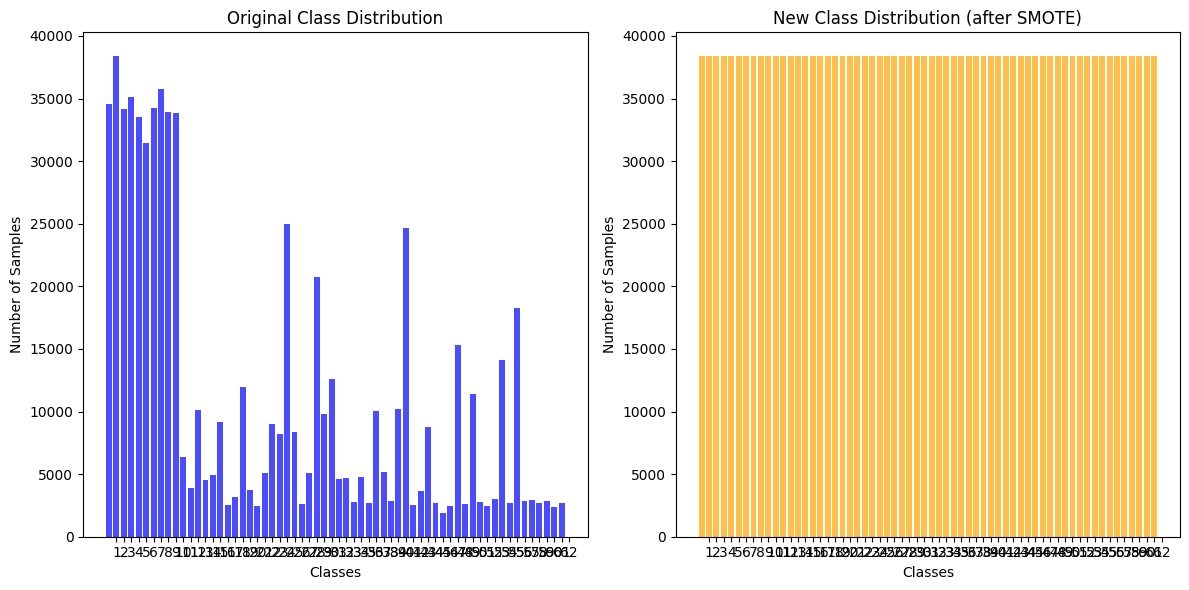

In [3]:
import matplotlib.pyplot as plt

def plot_distribution(original_counts, new_counts):
    plt.figure(figsize=(12, 6))

    # Original Distribution
    plt.subplot(1, 2, 1)
    plt.bar(original_counts.keys(), original_counts.values(), color='blue', alpha=0.7)
    plt.title('Original Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.xticks(ticks=np.arange(1, 63, 1))  # Adjust ticks for classes

    # New Distribution
    plt.subplot(1, 2, 2)
    plt.bar(new_counts.keys(), new_counts.values(), color='orange', alpha=0.7)
    plt.title('New Class Distribution (after SMOTE)')
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.xticks(ticks=np.arange(1, 63, 1))  # Adjust ticks for classes

    plt.tight_layout()
    plt.show()

# Plot the distributions
plot_distribution(original_distribution, new_distribution)

In [4]:
import torch

# Save the tensors
torch.save({
    'images': X_resampled_tensor,
    'labels': y_resampled_tensor
}, 'resampled_emnist.pt')

## Borderline-SMOTE

New distribution: Counter({35: 38374, 36: 38374, 6: 38374, 3: 38374, 22: 38374, 38: 38374, 5: 38374, 9: 38374, 47: 38374, 4: 38374, 7: 38374, 56: 38374, 29: 38374, 40: 38374, 55: 38374, 57: 38374, 43: 38374, 32: 38374, 15: 38374, 26: 38374, 2: 38374, 28: 38374, 8: 38374, 49: 38374, 12: 38374, 1: 38374, 59: 38374, 18: 38374, 41: 38374, 0: 38374, 46: 38374, 23: 38374, 51: 38374, 24: 38374, 31: 38374, 45: 38374, 39: 38374, 11: 38374, 54: 38374, 19: 38374, 20: 38374, 61: 38374, 25: 38374, 37: 38374, 52: 38374, 58: 38374, 14: 38374, 34: 38374, 30: 38374, 27: 38374, 16: 38374, 33: 38374, 21: 38374, 60: 38374, 48: 38374, 53: 38374, 13: 38374, 10: 38374, 50: 38374, 17: 38374, 42: 38374, 44: 38374})


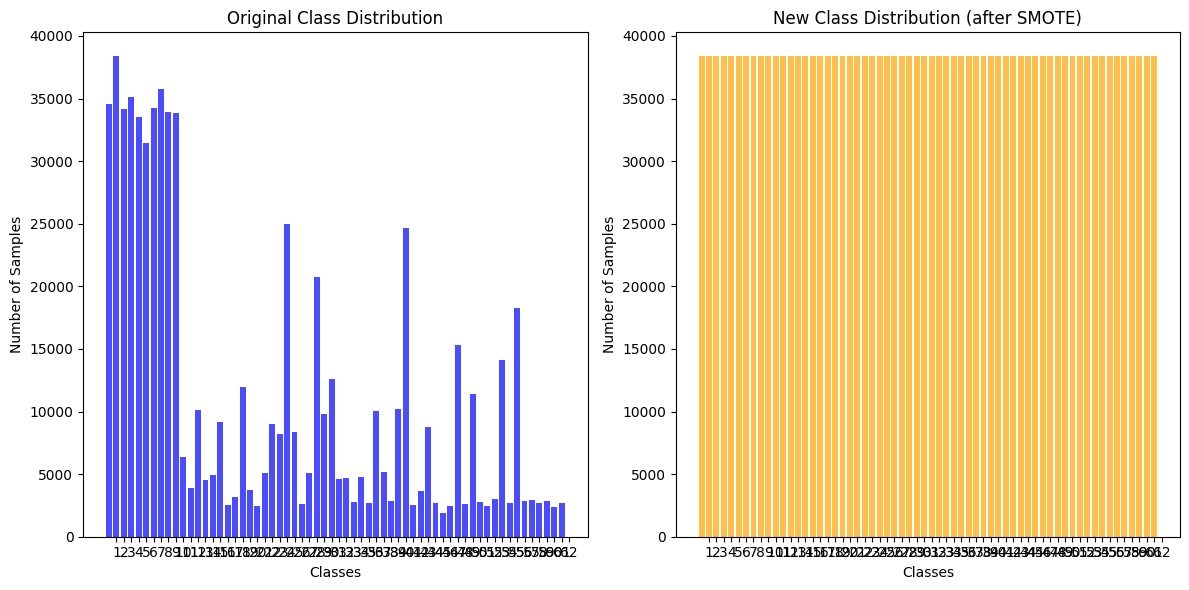

In [6]:
from imblearn.over_sampling import BorderlineSMOTE

# Apply Borderline-smote
borderlinesmote = BorderlineSMOTE(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = borderlinesmote.fit_resample(X, y)

# Count the new class distribution
new_distribution = Counter(y_resampled)
print("New distribution:", new_distribution)

# Convert back to PyTorch tensors
X_resampled_tensor = torch.tensor(X_resampled, dtype=torch.float32)
y_resampled_tensor = torch.tensor(y_resampled, dtype=torch.long)

# Now you can create a new dataset with the resampled data
class ResampledEMNIST(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        return self.images[idx].view(1, 28, 28), self.labels[idx]  # Reshape to original image dimensions

# Create the resampled dataset
resampled_dataset = ResampledEMNIST(X_resampled_tensor, y_resampled_tensor)

# Plot the distributions
plot_distribution(original_distribution, new_distribution)

In [7]:
import torch

# Save the tensors
torch.save({
    'images': X_resampled_tensor,
    'labels': y_resampled_tensor
}, 'blsmote_resampled_emnist.pt')